In [1]:
### RUN THIS CELL (0 Lines) ###
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
### RUN THIS CELL (0 Lines) ###

In [2]:
### RUN THIS CELL (0 Lines) ###
# getOnehottedDataset - takes a dataframe, a set of features, and prefix names for those features, and one-hots those features.
# Note: ENSURE that the features passed in are discrete/not continuous. 
# @params: 
#    - dataset is a dataframe of individuals you seek to onehot the features of
#    - features is an array of features in the dataset you wish to one-hot
#    - prefixes is an array of names that will be the prefixes of the new columns produced via the one-hot function
# @return: 
#    - returns the dataset with the features, one-hotted.
def getOnehottedDataset(dataset, features, prefixes):
# race, sex, sports, birth origin, education, educational prestige, criminal record, arrest record,
    onehotted_data = dataset.copy()
    onehotted_data = pd.get_dummies(onehotted_data, columns=features, prefix=prefixes)
    return onehotted_data

# transformDatapointsToScale - normalizes the features in the dataset matching with features passed in via selectedFeatures.
# This is done by dividing each of the chosen columns by that columns' max.
# @params:
#    - dataset is a dataframe containing individuals (employees or candidates)
#    - selectedFeatures is an array of strings, where each string is a feature in the df we seek to normalize
# @returns:
#    - the dataframe w. selectedFeature's normalized.
def transformDatapointsToScale(candidates, selectedFeatures):
    df = candidates.copy()
    for feature in selectedFeatures:
        maximum = df[feature].max()
        df[feature] = df[feature].apply(lambda x: x / maximum)
    return df

# scoreJobCandidates - calculates a score for each candidate by taking the linear combination of the selectedFeatures
# and weights of each candidate. 
# @params:
#    - candidates is a dataframe containing candidates
#    - selectedFeatures is an array of strings, where each string is a feature in the df
#    - weights is an dictionary of features -> floats from 0-1.
# @returns:
#   - the candidates w. a new column "Scores" 
def scoreJobCandidates(candidates, selectedFeatures, weights):
    candidates = candidates.copy()
    for elem in selectedFeatures:
        candidates[elem] = candidates[elem].apply(lambda x: weights[elem] * x)
    candidates["Scores"] = 0
    for elem in selectedFeatures:
        candidates["Scores"] = candidates["Scores"] + candidates[elem]
    return candidates
        
# rankJobCandidates - sorts a dataframe by the "Score" feature - NOTE: assumes that candidate df has "Score"
#  @params:
#    - candidates is a dataframe containing candidates
#  @returns:
#    - df containing candidates but sorted by descending Scores    
def rankJobCandidates(candidates):
    df = candidates.copy()
    df = df.sort_values(["Scores"], ascending=False)
    return df

# graphSelectionRates - outputs a bar graph of the selection rates for each protectedClass, depending on the protected
# class you pass in (race or gender). 
# @params: 
#    - selected is a dataframe of all of the candidates that were chosen by the algorithm
#    - candidates is a dataframe containing all candidates
#    - protectedClass is a flag passed in as either "race" or "gender" depending on what the selection rates you'd like
# @return: 
#    - prints selection rates and a bar graph.
def graphSelectionRates(selected, candidates, protectedClass):
    selected_candidates = selected.copy()
    candidates_all = candidates.copy()
    raceIndxs = {"Caucasian": 0, "African-American": 1, "Asian": 2, "Hispanic": 3, "Other": 4 }
    sexIndxs = {"Male":0, "Female":1}
    
    if protectedClass == "race":
        features = [col for col in selected_candidates if col.startswith("race_")]
        race_selected = selected_candidates[features].idxmax(axis=1).str.replace('race_', '')
        race_all = candidates_all[features].idxmax(axis=1).str.replace('race_', '')
        
        candidates_all["Race"] = race_all
        selected_candidates["Race"] = race_selected

        numCandidates = candidates_all["Race"].value_counts()
        numQualified = selected_candidates["Race"].value_counts()
        
        keys = numQualified.keys()
        
        raceToVal = {
            "Caucasian": 0,
            "Asian": 0,
            "African-American": 0,
            "Hispanic": 0,
            "Other": 0
        }
        
        for key in keys:
            raceToVal[key] = numQualified[key]
            
        selectionRate1 = raceToVal["Caucasian"] / numCandidates["Caucasian"]
        selectionRate2 = raceToVal["Asian"] / numCandidates["Asian"]
        selectionRate3 = raceToVal["African-American"] / numCandidates["African-American"]
        selectionRate4 = raceToVal["Hispanic"] / numCandidates["Hispanic"]
        
        print("The selection rate for " + "Caucasian" + "s: ",selectionRate1)
        print("The selection rate for " + "Asian" + "s: ", selectionRate2)
        print("The selection rate for " + "African-American" + "s: ",selectionRate3)
        print("The selection rate for " + "Hispanic" + "s: ",selectionRate4)
        
        y_pos = np.arange(4)
        performance = [selectionRate1, selectionRate2, selectionRate3, selectionRate4]
        plt.bar(y_pos, performance, align='center', alpha=0.5)
        plt.xticks(y_pos, ("Caucasian", "Asian", "African-American", "Hispanic"))
        plt.ylabel('Selection Rate')
        plt.title('Selection Rate Comparisons by Race')
        plt.show()
    elif protectedClass == "gender":
        features = [col for col in selected_candidates if col.startswith("gender_")]
        gender_selected = selected_candidates[features].idxmax(axis=1).str.replace('gender_', '')
        gender_all = candidates_all[features].idxmax(axis=1).str.replace('gender_', '')

        candidates_all["Gender"] = gender_all
        selected_candidates["Gender"] = gender_selected
        
        numCandidates = candidates_all["Gender"].value_counts()
        numQualified = selected_candidates["Gender"].value_counts()
        
        print(numCandidates)
        print(numQualified) 
        
        maleSelectionRate = numQualified["male"] / numCandidates["male"]
        femaleSelectionRate = numQualified["female"] / numCandidates["female"]
        print("The selection rate for " + "Male" + "s: ", maleSelectionRate)
        print("The selection rate for " + "Female" + "s: ", femaleSelectionRate)
        y_pos = np.arange(2)
        performance = [maleSelectionRate, femaleSelectionRate]
        plt.bar(y_pos, performance, align='center', alpha=0.5)
        plt.xticks(y_pos, ("Male", "Female"))
        plt.ylabel('Selection Rate')
        plt.title('Selection Rate Comparisons by Sex')
        plt.show()
    else:
        print("Try another protected type - gender or race")
### RUN THIS CELL (0 Lines) ###

# Milestone 1
## Exercise 3: Putting it together.

We're going to introduce a new model to you called Nearest Neighbors for the purposes of exposing a different method of algorithmic decision-making. In the last exercise the way we made decisions is through a ranking method based on a score.  However, another way we can make decisions is by comparing the job candidates' similarities to the employees. If their characteristics are more similar to good employees, then we deem them a good prospect.  If their characteristics are more similar to bad employees, then we deem them a poor prospect and we probably won't bring them through.


But to do this, we need some way to label an employee as "good" or "bad" or "excellent" or "ok", in another words we need to have labels for each employee representing an objective measure of their performance.  Recall that we tried this in Exercise 1. We attempted to label the employees via our intuition or some formulaic test your team came up with.  


Here, we'll generate labels for each of the employees by using the ranking model. Your team will again choose metrics and weights to calculate a score for each employee to which they will be ranked. The top 20th percent of scores (top 5 employees) will get labeled +2, next 20th percentile +1, and so on.

In [9]:
# RUN THIS CELL (0 Lines) #
employees = pd.read_csv("../Employees_M1/employees_milestone1.csv")
employees = employees.astype({'HireVue Score': 'float64', 'Arrest Record': 'float64', 'Criminal Record': 'float64', 'Employee Referral': 'float64'})
candidates = pd.read_csv("../Candidates_M1/candidates_milestone1.csv")
# RUN THIS CELL #

In [10]:
# RUN THIS CELL (0 Lines) #
# Put together the labels for the employees
# One-hottng the dataset for use
features = ["Race", "Gender", "Birth Origin", "Criminal Record",
           "Arrest Record", "LinkedIn Score", "Responsible Social Media Use", 
            "Sports", "Undergraduate Degree"]
prefixes = ["race", "gender", "origin", "criminal", "arrest", "linkedin", 
           "socmedia", "sports", "degree"]
employees_race = employees["Race"]
candidates_race = candidates["Race"]
employees_processed = getOnehottedDataset(employees, features, prefixes)
employees_processed["Race"] = employees_race
candidates_processed = getOnehottedDataset(candidates, features, prefixes)
candidates_processed["Race"] = candidates_race

employees_processed.info()
# RUN THIS CELL (0 Lines) #

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Names                       2000 non-null   object 
 1   Age                         2000 non-null   float64
 2   Zip                         2000 non-null   int64  
 3   Education                   2000 non-null   int64  
 4   GPA                         2000 non-null   float64
 5   Educational Prestige        2000 non-null   float64
 6   Years of Experience         2000 non-null   float64
 7   Soft Skills                 2000 non-null   float64
 8   Manager's Assessment Score  2000 non-null   float64
 9   Military Tenure             2000 non-null   float64
 10  Avg Commute Time            2000 non-null   float64
 11  Job Tenure                  2000 non-null   float64
 12  Cultural Fit                2000 non-null   float64
 13  Leadership Capability       2000 

#### Task 1: Choose Metrics and Weights for Labelling via the Ranking Model:

To re-iterate, your team will choose the features you want to combine and weights to calculate a score for each of the 2000 employees. Then you will run the ranking model to then partition the employees into subsequent quintiles with each quintile representing a respective label from "+2" to "-2".

In [16]:
# RUN THIS CELL (2 Lines) #
selectedFeatures = [
    "Manager's Assessment Score",
    "Job Tenure",
    "Avg Deals Closed"
    # Insert the metrics you want to adjudicate the employees by
]
weights = {
    "Manager's Assessment Score": 1.5,
    "Job Tenure": 2.0,
    "Avg Deals Closed":1.25
    # Insert the same as the weights
}

employees_scaled = transformDatapointsToScale(employees_processed, selectedFeatures)
employees_scored = scoreJobCandidates(employees_scaled, selectedFeatures, weights)
employees_ranked = rankJobCandidates(employees_scored)


# assignLabels - is a function which takes in a set of ranked employees, 
# then labels them by their percentile range. In this case the top 20%
# get a +2, the next top 20% get a +1, and so on. 
# @param - employees that are RANKED
# @returns - employees with a new column "Label"
def assignLabels(employees):
    employees_labelled = employees.copy()
    fifth = math.floor(len(employees) / 5)
    print(fifth)
    num = 2
    labels = []
    for x in range(5):
        for y in range(fifth):
            labels.append(num)
        num -= 1
    print(len(labels))
    employees_labelled["Label"] = labels
    return employees_labelled

employees_labelled = assignLabels(employees_ranked)
employees_labelled
# RUN THIS CELL (2 Lines) #

400
2000


Names   Age    Zip  Education   GPA  Educational Prestige  \
1660      Zachary Byrd  40.0  94595          5  3.92                  0.37   
1262  Andra Mclaughlin  36.0  94402          5  2.72                  0.39   
1571       Ashley Bohn  33.0  94403          4  3.22                  0.39   
1155        Derek Ball  35.0  94025          5  3.50                  0.35   
970        Bertha Vega  41.0  94304          5  3.47                  0.67   
...                ...   ...    ...        ...   ...                   ...   
536        Wade Warner  24.0  94549          1  2.12                  0.31   
1656       Paul Morgan  23.0  94503          1  2.34                  0.11   
552      Lillian Corry  29.0  94014          1  2.86                  0.22   
1995      Carla Starks  29.0  94402          1  2.32                  0.30   
454       Cecil Abbott  18.0  94595          1  1.82                  0.33   

      Years of Experience  Soft Skills  Manager's Assessment Score  \
1660                  6.5         4.97                    1.445802   
1262                  6.0         0.89                    1.113740   
1571                  5.0         3.86                    1.048092   
1155                  8.5         4.27                    1.203053   
970                   9.0         5.11                    1.369466   
...                   ...          ...                         ...   
536                   3.0         1.45                    0.223664   
1656                  0.5         1.55                    0.349618   
552                   0.0        -0.84                    0.182443   
1995                  1.0         1.84                    0.309924   
454                  -5.0         0.25                   -0.060305   

      Military Tenure  ...  sports_1.0  sports_2.0  degree_Engineering  \
1660              4.5  ...           0           1                   0   
1262              0.0  ...           1           0                   0   
1571              0.0  ...           0           1                   1   
1155              0.0  ...           0           1                   1   
970               0.0  ...           0           1                   1   
...               ...  ...         ...         ...                 ...   
536               0.0  ...           1           0                   1   
1656              0.0  ...           0           0                   1   
552               0.0  ...           1           0                   0   
1995              0.0  ...           0           0                   0   
454               0.5  ...           1           0                   1   

      degree_Humanities  degree_None  degree_Quantitative  degree_Sciences  \
1660                  0            0                    1                0   
1262                  0            0                    1                0   
1571                  0            0                    0                0   
1155                  0            0                    0                0   
970                   0            0                    0                0   
...                 ...          ...                  ...              ...   
536                   0            0                    0                0   
1656                  0            0                    0                0   
552                   0            0                    1                0   
1995                  0            0                    1                0   
454                   0            0                    0                0   

                  Race    Scores  Label  
1660          Hispanic  3.672473      2  
1262             Asian  3.483254      2  
1571         Caucasian  3.423891      2  
1155         Caucasian  3.383104      2  
970              Other  3.367976      2  
...                ...       ...    ...  
536          Caucasian  0.683330     -2  
1656         Caucasian  0.679378     -2  
552   African-American  0.613111   

#### Task 2: Choosing the Features & Running the Model

Ok, so now that each employee has a label, we can set up and run the nearest neighbor model. As described earlier general idea behind this model is we give candidates the same label as the employee they are the most similar to based on their features.  So if the prospect is the most similar to employee X who has "+2" performance, we'll predict that the candidate has "+2" performance.

* This is how the model works:
    * Choose the data points we believe are most expressive of the 25 employees'.
    * For each of the candidates:
        * For each of the model employees
            * Calculate the "distance" between the candidate and the particular model employee
        * Pick out the label of model employee that has the least distance, is closest, to the candidate
        * Assign that label to the candidate.
    * Select all candidates with "excellent" predictions for the next round of interviews.

First let's prepare all aspects of the model...

In [23]:
# RUN THIS CELL (0 Lines) #
#------------ Preparing our model ------------###

# NearestNeighbor - defines a class for running a nearest neighbor model. 
class NearestNeighbor(object):
    def __init__(self):
        pass
    
    # train - member function of NearestNeighbor taking in a dataframe, and an array of selected
    # features, stores the selectedfeature data as a member variable Xtr, and labels as ytr
    # @params 
    # - data is a dataframe of individuals, 
    # - selectedFeatures is an array of strings, where each string is assumed to be a feature in the dataset.
    # @returns - nothing
    def train(self, data, selectedFeatures):
        X = data[selectedFeatures]
        y = data["Label"]
        self.Xtr = X.to_numpy()
        self.ytr = y.to_numpy()
        
    # predict - member function of NearestNeighbor takes in a dataframe, and array of selectedFeatures
    # predict takes the X, selectedFeatures. 
    # @params
    #  - X is a dataframe of individuals that we want to have the NN model classify
    #. - selectedFeatures are the features we want to use to compare candidates to our employees
    # @returns
    #. - dataframe w. "Label" column - the predictions of the NN model
    def predict(self, X, selectedFeatures):
        X_df = X.copy()
        X = X[selectedFeatures].to_numpy()
        num_test = X.shape[0]
        Ypred = np.zeros(num_test, dtype = self.ytr.dtype)
        
        for i in range(num_test):
            distances = np.sum(np.abs(self.Xtr - X[i, :]), axis = 1)
            min_index = np.argmin(distances)
            Ypred[i] = self.ytr[min_index]
        X_df["Label"] = Ypred
        return X_df
    
    # select - simply checks the label and returns the individuals in the df who got a +2
    # X - the df of individuals classified we want to select.
    def select(self, X):
        return X[X["Label"].isin([2])]
# RUN THIS CODE #

##### Select features to calculate the distance between employees and candidates below.

In [24]:
# RUN THIS CELL (1 Line) #
# We need features for the model
selectedFeatures = [
    "GPA", "Leadership Capability", "Avg Commute Time",
    # "a", "b", "c" #
]
# RUN THIS CELL  #

In [25]:
# RUN THIS CELL (0 Lines) #
candidates_scaled = transformDatapointsToScale(candidates_processed, selectedFeatures)
employees_labelled = transformDatapointsToScale(employees_labelled, selectedFeatures)
model = NearestNeighbor()
model.train(employees_labelled, selectedFeatures)
candidate_predicted_labels = model.predict(candidates_scaled, selectedFeatures)
selectedCandidates = model.select(candidate_predicted_labels)  # Selection is based on candidates receiving label of +2.
# RUN THIS CELL #

#### Task 3: Disparate Outcome?



The selection rate for Caucasians:  0.22181818181818183
The selection rate for Asians:  0.22666666666666666
The selection rate for African-Americans:  0.18571428571428572
The selection rate for Hispanics:  0.24


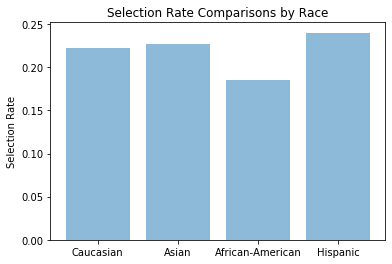

In [26]:
# RUN THIS CELL (1 parameter) #
graphSelectionRates(selectedCandidates, candidates_processed, "race")
# RUN THIS CELL #

##### Questions:
 * Report whether the model produces a disparate impact.
 * If your algorithm's results do demonstrate a disparate impact in selection rates, from where in the algorithm's design or in the characteristics of the data have you found it to arise from. You can use the tools in the subtasks to try and investigate skewed distributions, poor feature selection, etc. Report your findings.
 * Discuss changes, methods, tweaks you could implement to rectify disparity with your team. Report the ideas you discussed.


#### Task 4: Inclusion/Exclusion of protected attribute?

Your team may have chosen explicitly to either include or exclude race, or gender, or you may have chosen to include it. It's important to consider the effect of these decisions. Try making inclusions or exclusions of race and observe the effects on the nearest neighbor models behavior below.


In [28]:
# RUN THIS CELL (1 Line) #
selectedFeatures = [
    "GPA", "Leadership Capability", "Avg Commute Time", "race_African-American"
    # "a", "b", "c"
]

candidates_scaled = transformDatapointsToScale(candidates_processed, selectedFeatures)
employees_labelled = transformDatapointsToScale(employees_labelled, selectedFeatures)

model = NearestNeighbor()
model.train(employees_labelled, selectedFeatures)
candidate_predicted_labels = model.predict(candidates_scaled, selectedFeatures)
selectedCandidates = model.select(candidate_predicted_labels)
# RUN THIS CELL (1 Line) #

The selection rate for Caucasians:  0.2109090909090909
The selection rate for Asians:  0.24
The selection rate for African-Americans:  0.2
The selection rate for Hispanics:  0.24


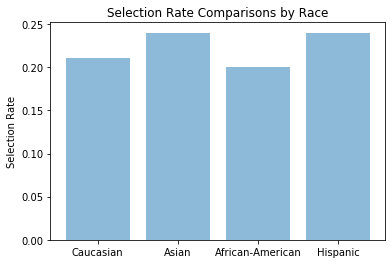

In [29]:
# RUN THIS CELL (1 parameter) #
graphSelectionRates(selectedCandidates, candidates_scaled, "race")
# RUN THIS CELL (1 parameter) #

##### Questions:
* Did your team decide to include or exclude race in your use of the nearest neighbor model? How did you come to your decision?
* If you did include it, is this an instance of disparate treatment?
* If you did not include it, try doing so, do you find any significant change in selection rates? Suppose selection rates were rectified by virtue of the inclusion of race, would it be justified to use it in our algorithm?

## Task 5: Inclusion of alternative datapoints?

The HR Engineering Team, aware of your comprehensive investigation and company-critical project is worried that the initial dataset given to you may be flawed.  Fortunately, they came across voice recordings of the employees and candidates that were saved from their HireVue online interviews.  

While HireVue produces their own score available in the dataset, the team had begun to build a deep Neural Network to conduct audio analysis and try to score the candidates using their own in-house algorithm.  

Here are a few samples of the audio recordings. One of the key features of these audio recordings is measuring the the relative clarity of the speaker, we can do this by extracting features from the spectrogram measurements. See below how this would be done.

In [2]:
### RUN THIS CELL (0 Lines) ###
# Loads some packages we can use for .wav data!
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd
### RUN THIS CELL (0 Lines) ###

In [4]:
### RUN THIS CELL (0 Lines) ###
# Loads up an audio sample of an interview you can listen to!
print("Sample: ")
ipd.Audio('../audio/M_0061_16y9m-1.wav')
### RUN THIS CELL (0 Lines) ###

Sample 2: 


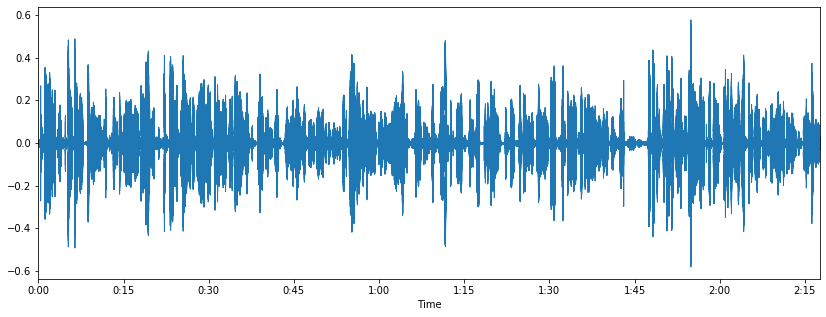

In [5]:
### RUN THIS CELL (0 Lines) ###
# Displays the amplitude waveform  of the audio sample #
x, sr = librosa.load('../audio/M_0061_16y9m-1.wav')
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)
### RUN THIS CELL ###

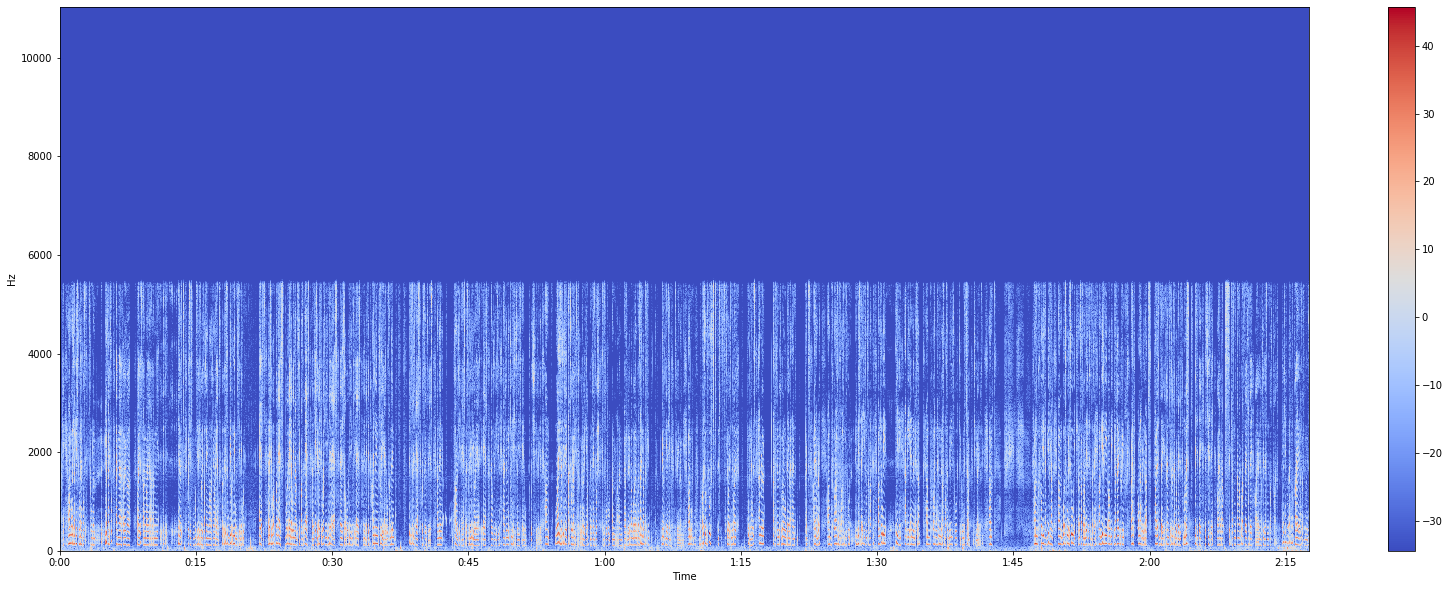

In [7]:
### RUN THIS CELL (0 Lines) ###
# Displays the spectrogram! #
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(28, 10))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
### RUN THIS CELL (0 Lines) ###

A spectrogram is a visual way of representing the signal strength, of a signal over time at various frequences present in a particular waveform. We depict the spectrogram as a heat map, as an image with the intensity shown by varying the color or brightness. 

From the spectrogram, suppose the data is used to calculate a metric of average loudness, as a proxy for the candidate's clarity of speech, among other collected features from the voice recordings. It turns out Loudness is quite complicated [See here](https://github.com/librosa/librosa/issues/463)

##### Questions:
* How might the inclusion of this alternative datapoint pose difficulties under statutory law on employment discrimination.
* To comply with the ADA, as Sprawlmart's counsel, how might you provide a reasonable accomodation to individuals objecting to its use?
* Would such a feature satisfy the business necessity test? Try brainstorming features that could be extracted from a voice recording (feel free to search online).  List 2-3 you find and discuss whether your team believes they would satisfy the business necessity test.